In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading train and test data set
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# taking a copy of data in case of future use
train_original = train.copy()
test_original = test.copy()

In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Uni variant Analysis

In [11]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
train['Education'].value_counts(normalize='True')

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [13]:
train['Loan_Status'].value_counts(normalize="True")

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

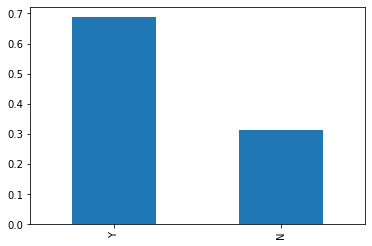

In [14]:
train['Loan_Status'].value_counts(normalize="True").plot.bar()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

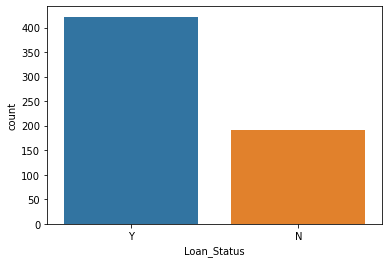

In [15]:
sns.countplot(x= train['Loan_Status'])

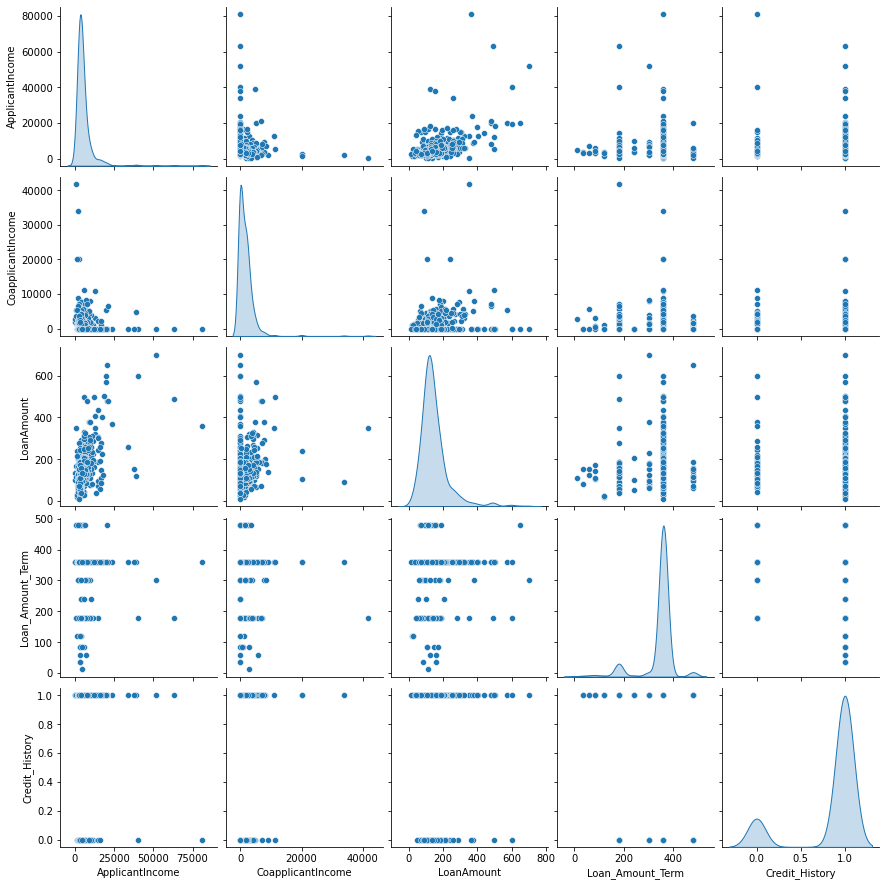

In [16]:
sns.pairplot(data = train, diag_kind='kde')

<AxesSubplot:title={'center':'Married'}>

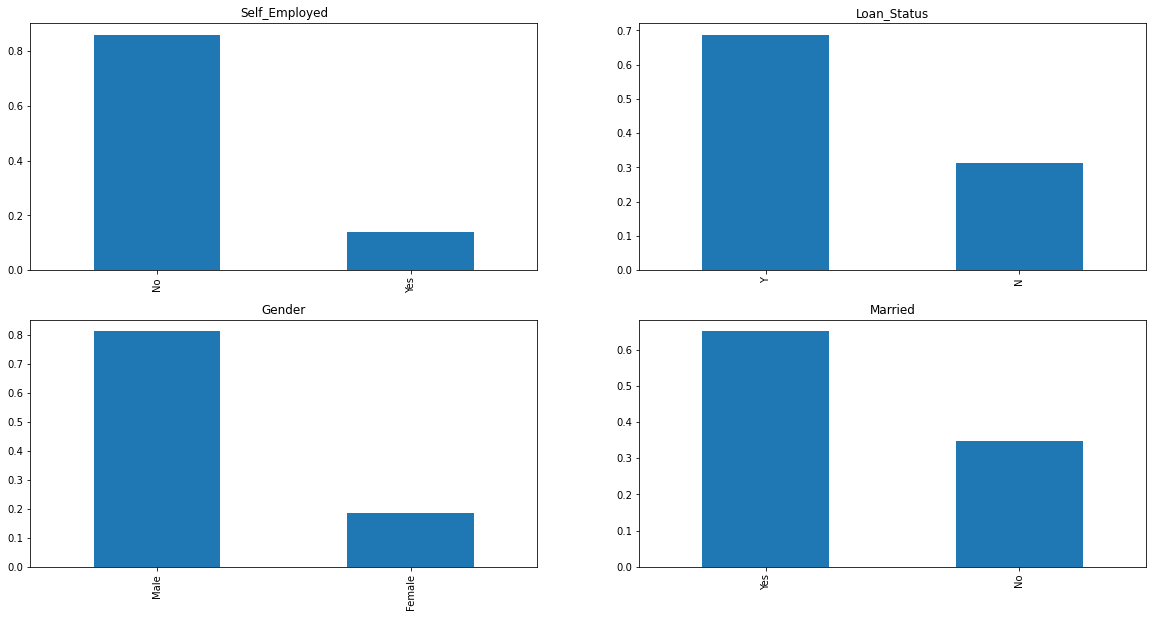

In [17]:
plt.subplot(221)
train['Self_Employed'].value_counts(normalize="True").plot.bar(figsize=(20,10) , title = 'Self_Employed')
plt.subplot(222)
train['Loan_Status'].value_counts(normalize="True").plot.bar(figsize=(20,10) , title = 'Loan_Status')
plt.subplot(223)
train['Gender'].value_counts(normalize="True").plot.bar(figsize=(20,10) , title = 'Gender')
plt.subplot(224)
train['Married'].value_counts(normalize="True").plot.bar(figsize=(20,10) , title = 'Married')

<AxesSubplot:title={'center':'Property_Area'}>

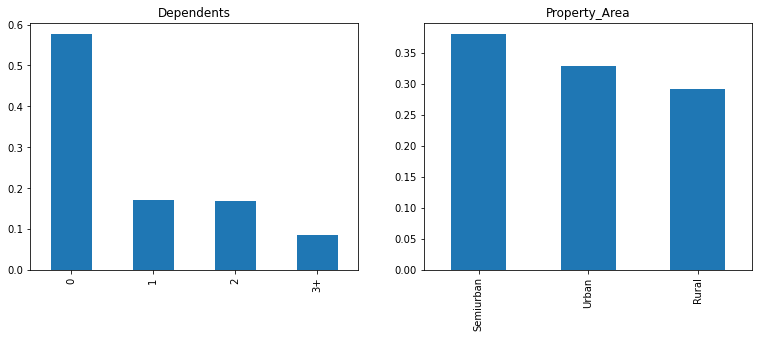

In [18]:
plt.subplot(231)
train['Dependents'].value_counts(normalize="True").plot.bar(figsize=(20,10) , title = 'Dependents')
plt.subplot(232)
train['Property_Area'].value_counts(normalize="True").plot.bar(figsize=(20,10) , title = 'Property_Area')

finding distribution and outliers:

C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

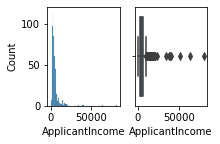

In [19]:
plt.subplot(241)
sns.histplot(train['ApplicantIncome'])
plt.subplot(242)
sns.boxplot(train['ApplicantIncome'])

Text(0.5, 0.98, '')

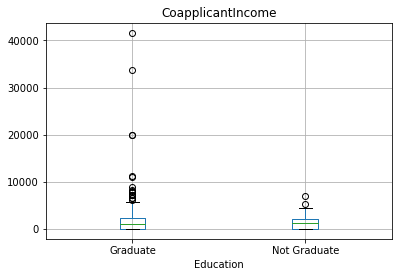

In [20]:
train.boxplot(column ='CoapplicantIncome', by = 'Education' )
plt.suptitle("")

C:\Anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

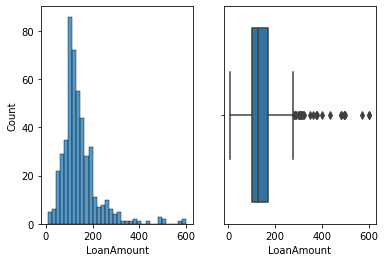

In [21]:
plt.figure(1)
plt.subplot(121)
train = train.dropna()
sns.histplot(train['LoanAmount'])

plt.subplot(122)
sns.boxplot(train['LoanAmount'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

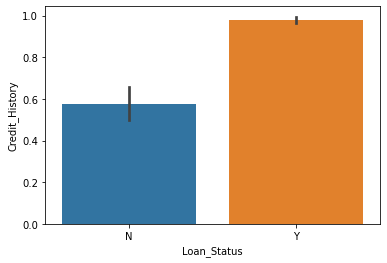

In [22]:
sns.barplot( x = 'Loan_Status', y='Credit_History', data = train)

<AxesSubplot:ylabel='Frequency'>

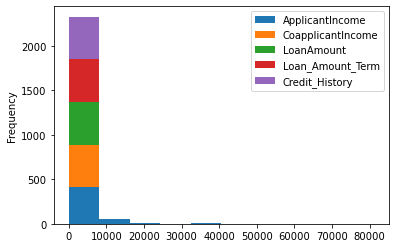

In [23]:
train.plot(kind='hist', stacked= True , bins = 10)

Bivariant analysis

In [24]:
gender = pd.crosstab(train['Gender'], train['Loan_Status'])
gender

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


<AxesSubplot:xlabel='Gender'>

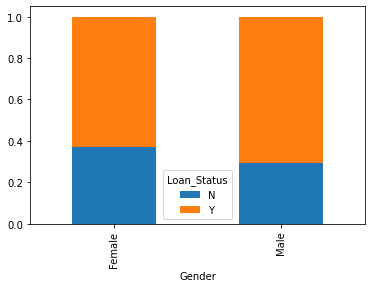

In [25]:
gender.div(gender.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = 'True')

In [26]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])


<AxesSubplot:xlabel='Married'>

<Figure size 432x288 with 0 Axes>

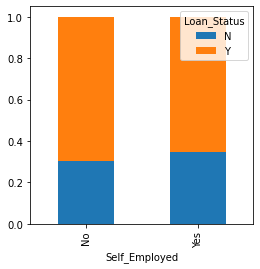

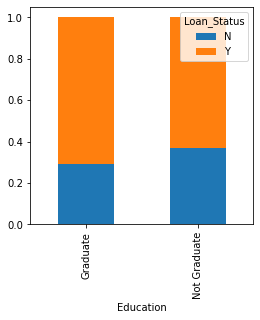

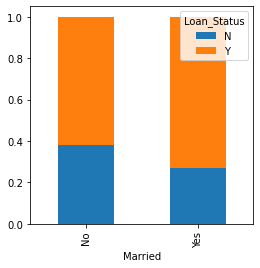

In [28]:
plt.figure(1)
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = 'True', figsize=(4,4))
Education.div(Education.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = 'True', figsize=(4,4))
Married.div(Married.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = 'True', figsize=(4,4))

In [29]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [30]:
dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
ApplicantIncome = pd.crosstab(train['ApplicantIncome'], train['Loan_Status'])
CoapplicantIncome = pd.crosstab(train['CoapplicantIncome'], train['Loan_Status'])
Loan_Amount_Term = pd.crosstab(train['Loan_Amount_Term'], train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])


In [31]:
train['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

<AxesSubplot:xlabel='ApplicantIncome'>

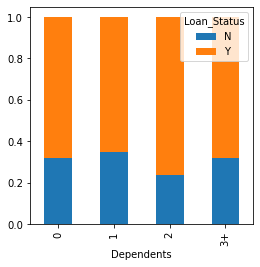

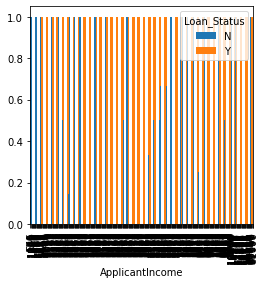

In [32]:
dependents.div(dependents.sum(1).astype('float'), axis = 0).plot(kind='bar', figsize=(4,4),stacked='True')
ApplicantIncome.div(ApplicantIncome.sum(1).astype('float'), axis = 0).plot(kind='bar', figsize=(4,4),stacked='True')


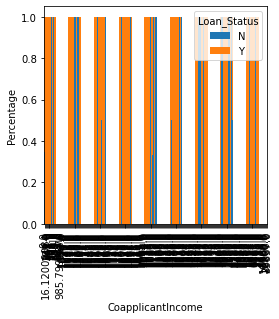

In [33]:
CoapplicantIncome.div(CoapplicantIncome.sum(1).astype('float'), axis = 0).plot(kind='bar', figsize=(4,4),stacked='True')
plt.xlabel('CoapplicantIncome')
P= plt.ylabel('Percentage')

In [34]:
bins = [1,1000,3000,42000]
group = ['Low', 'Average', 'High']
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group )

<ipython-input-34-8a80d99b6969>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels = group )


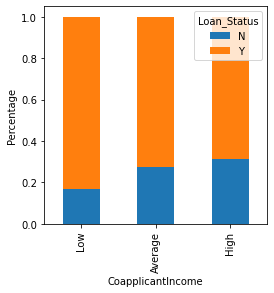

In [35]:
CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'], train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype('float'), axis = 0).plot(kind='bar', figsize=(4,4),stacked='True')
plt.xlabel('CoapplicantIncome')
P= plt.ylabel('Percentage')

In [36]:
train['LoanAmount'].max()

600.0

In [37]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CoapplicantIncome_bin'],
      dtype='object')

In [38]:
train['total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<ipython-input-38-adc6296e5b02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']


In [39]:
train['total_Income'].max()

81000.0

In [40]:
bins = [ 1, 20000, 30000, 60000, 81000]
groups = [ 'Low', 'Average', 'High', 'very high']
train['total_Income_bin'] = pd.cut(train['total_Income'], bins, labels = groups)
total_Income_bin = pd.crosstab(train['total_Income_bin'], train['Loan_Status'])

<ipython-input-40-26fff17c0a6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_Income_bin'] = pd.cut(train['total_Income'], bins, labels = groups)


<AxesSubplot:xlabel='total_Income_bin'>

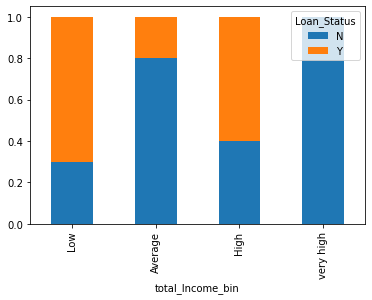

In [41]:
total_Income_bin.div(total_Income_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = 'True')

<ipython-input-42-fe1053bfca70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = groups)


<AxesSubplot:xlabel='LoanAmount_bin'>

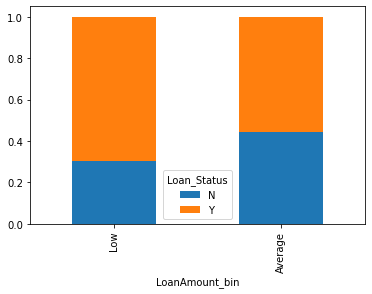

In [42]:
bins = [ 1, 400, 600, 800]
groups = [ 'Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = groups)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1), axis = 0).plot(kind = 'bar', stacked = 'True')

In [43]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CoapplicantIncome_bin', 'total_Income', 'total_Income_bin',
       'LoanAmount_bin'],
      dtype='object')

In [44]:
train.drop(['CoapplicantIncome_bin','total_Income', 'total_Income_bin', 'LoanAmount_bin'], axis = 1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Handling categorical values

In [45]:
train['Dependents'].replace('3+', 3 , inplace = True)
test['Dependents'].replace('3+', 3 , inplace = True)

C:\Anacoda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [46]:
train['Dependents'].unique()

array(['1', '0', '2', 3], dtype=object)

In [47]:
train['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [48]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_Income
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,0.900097
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.331580
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,0.553914
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.012822
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.057126
total_Income,0.900097,0.331580,0.553914,-0.012822,-0.057126,1.000000


<AxesSubplot:>

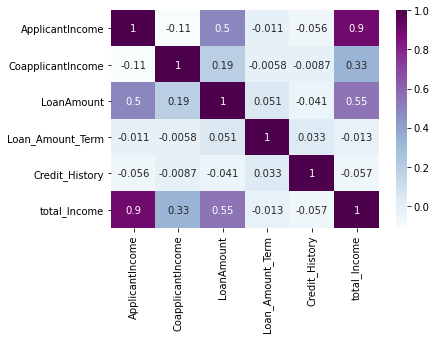

In [49]:
sns.heatmap(data= train.corr(), annot = True ,cmap = "BuPu")

In [50]:
train = pd.get_dummies(data= train, columns= ['Gender', 'Married','Self_Employed','Loan_Status'],drop_first = True )

In [51]:
train.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,CoapplicantIncome_bin,total_Income,total_Income_bin,LoanAmount_bin,Gender_Male,Married_Yes,Self_Employed_Yes,Loan_Status_Y
1,LP001003,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,Average,6091.0,Low,Low,1,1,0,0
2,LP001005,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,NaN,3000.0,Low,Low,1,1,1,1
3,LP001006,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Average,4941.0,Low,Low,1,1,0,1
4,LP001008,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,NaN,6000.0,Low,Low,1,0,0,1
5,LP001011,2,Graduate,5417,4196.0,267.0,360.0,1.0,Urban,High,9613.0,Low,Low,1,1,1,1


In [52]:
train.drop(['total_Income', 'total_Income_bin', 'LoanAmount_bin', 'CoapplicantIncome_bin'], axis = 1, inplace = True)

In [53]:
train.columns

Index(['Loan_ID', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Gender_Male', 'Married_Yes', 'Self_Employed_Yes',
       'Loan_Status_Y'],
      dtype='object')

In [54]:
train.rename(columns={'Loan_Status_Y':'Loan_Status', 'Gender_Male':'Gender', 'Married_Yes':'Married', 'Self_Employed_Yes':'Self_Employed'}, inplace = True)

In [55]:
train.columns

Index(['Loan_ID', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Gender', 'Married', 'Self_Employed', 'Loan_Status'],
      dtype='object')

In [56]:
train.head()

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Self_Employed,Loan_Status
1,LP001003,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,1,1,0,0
2,LP001005,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,1,1,1,1
3,LP001006,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,1
4,LP001008,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,1
5,LP001011,2,Graduate,5417,4196.0,267.0,360.0,1.0,Urban,1,1,1,1


In [57]:
train['Education'].replace('Graduate', 1, inplace = True)
train['Education'].replace('Not Graduate', 0, inplace = True)

In [58]:
train['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [59]:
train['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [0,1,2], inplace = True)

In [60]:
train = train.drop(['Loan_ID'], 1)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         480 non-null    object 
 1   Education          480 non-null    int64  
 2   ApplicantIncome    480 non-null    int64  
 3   CoapplicantIncome  480 non-null    float64
 4   LoanAmount         480 non-null    float64
 5   Loan_Amount_Term   480 non-null    float64
 6   Credit_History     480 non-null    float64
 7   Property_Area      480 non-null    int64  
 8   Gender             480 non-null    uint8  
 9   Married            480 non-null    uint8  
 10  Self_Employed      480 non-null    uint8  
 11  Loan_Status        480 non-null    uint8  
dtypes: float64(4), int64(3), object(1), uint8(4)
memory usage: 51.8+ KB


In [62]:
train['Dependents'].unique()

array(['1', '0', '2', 3], dtype=object)

In [63]:
train['Dependents'].replace(['1', '0', '2'], [1,0,2] , inplace = True)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         480 non-null    int64  
 1   Education          480 non-null    int64  
 2   ApplicantIncome    480 non-null    int64  
 3   CoapplicantIncome  480 non-null    float64
 4   LoanAmount         480 non-null    float64
 5   Loan_Amount_Term   480 non-null    float64
 6   Credit_History     480 non-null    float64
 7   Property_Area      480 non-null    int64  
 8   Gender             480 non-null    uint8  
 9   Married            480 non-null    uint8  
 10  Self_Employed      480 non-null    uint8  
 11  Loan_Status        480 non-null    uint8  
dtypes: float64(4), int64(4), uint8(4)
memory usage: 51.8 KB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [66]:
test['Dependents'].replace(['1', '0', '2'], [1,0,2] , inplace = True)

In [67]:
test = pd.get_dummies(data= test, columns= ['Gender', 'Married','Self_Employed'],drop_first = True )
test['Education'].replace('Graduate', 1, inplace = True)
test['Education'].replace('Not Graduate', 0, inplace = True)
test['Property_Area'].replace(['Rural', 'Urban', 'Semiurban'], [0,1,2], inplace = True)

In [68]:
test.rename(columns={ 'Gender_Male':'Gender', 'Married_Yes':'Married', 'Self_Employed_Yes':'Self_Employed'}, inplace = True)

In [69]:
test = test.drop(['Loan_ID'], 1)
test.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Self_Employed
0,0.0,1,5720,0,110.0,360.0,1.0,1,1,1,0
1,1.0,1,3076,1500,126.0,360.0,1.0,1,1,1,0
2,2.0,1,5000,1800,208.0,360.0,1.0,1,1,1,0
3,2.0,1,2340,2546,100.0,360.0,NaN,1,1,1,0
4,0.0,0,3276,0,78.0,360.0,1.0,1,1,0,0


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         357 non-null    float64
 1   Education          367 non-null    int64  
 2   ApplicantIncome    367 non-null    int64  
 3   CoapplicantIncome  367 non-null    int64  
 4   LoanAmount         362 non-null    float64
 5   Loan_Amount_Term   361 non-null    float64
 6   Credit_History     338 non-null    float64
 7   Property_Area      367 non-null    int64  
 8   Gender             367 non-null    uint8  
 9   Married            367 non-null    uint8  
 10  Self_Employed      367 non-null    uint8  
dtypes: float64(4), int64(4), uint8(3)
memory usage: 24.1 KB


Model Building

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
log_reg = LogisticRegression()

In [73]:
y = train['Loan_Status']
x = train.drop(['Loan_Status'], axis = 1)

In [74]:
log_reg.fit(x,y)

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [76]:
train.isnull().sum()

Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Gender               0
Married              0
Self_Employed        0
Loan_Status          0
dtype: int64

In [77]:
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

In [78]:
test.isnull().sum()

Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
Gender               0
Married              0
Self_Employed        0
dtype: int64

In [79]:
test['Credit_History'].fillna(test['LoanAmount'].median(), inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace = True)


In [80]:
test.isnull().sum()

Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Gender               0
Married              0
Self_Employed        0
dtype: int64

In [81]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [82]:
Y_predict = log_reg.predict(test)

In [83]:
Y_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state= 1)

In [86]:
log_reg.fit(x_train, y_train)
p= log_reg.predict(x_test)

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1], dtype=uint8)

In [88]:
confusion_matrix(p, y_test)

array([[18,  5],
       [25, 72]], dtype=int64)

In [89]:
accuracy_score(p, y_test)

0.75

In [90]:
from sklearn.model_selection import StratifiedKFold

In [91]:
x = x.to_numpy()
y = y.to_numpy()

In [92]:

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(x, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    log_reg.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(log_reg.score(x_test_fold, y_test_fold))
    
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

List of possible accuracy: [0.7708333333333334, 0.7708333333333334, 0.8541666666666666, 0.8125, 0.7708333333333334, 0.8541666666666666, 0.8125, 0.8125, 0.7916666666666666, 0.8333333333333334]

Maximum Accuracy That can be obtained from this model is: 85.41666666666666 %

Minimum Accuracy: 77.08333333333334 %

Overall Accuracy: 80.83333333333333 %

Standard Deviation is: 0.030618621784789708


Hyperparameter tuning: 

Direct Grid Search CV

In [93]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, refit = True, verbose = 3)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV 1/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 9/10] END ................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 10/10] END ...............C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/10] END ..............C=0.001, penalty=l2;, score=0.722 total time=   0.0s
[CV 2/10] END ..............C=0.001, penalty=l

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10] END ................C=0.1, penalty=l2;, score=0.889 total time=   0.0s
[CV 6/10] END ................C=0.1, penalty=l2;, score=0.778 total time=   0.0s
[CV 7/10] END ................C=0.1, penalty=l2;, score=0.750 total time=   0.0s
[CV 8/10] END ................C=0.1, penalty=l2;, score=0.694 total time=   0.0s
[CV 9/10] END ................C=0.1, penalty=l2;, score=0.806 total time=   0.0s
[CV 10/10] END ...............C=0.1, penalty=l2;, score=0.722 total time=   0.0s
[CV 1/10] END ..................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ..................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ..................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ..................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ..................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ..................C=1.0, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ..............

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/10] END ................C=1.0, penalty=l2;, score=0.806 total time=   0.0s
[CV 4/10] END ................C=1.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 5/10] END ................C=1.0, penalty=l2;, score=0.917 total time=   0.0s
[CV 6/10] END ................C=1.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 7/10] END ................C=1.0, penalty=l2;, score=0.750 total time=   0.0s
[CV 8/10] END ................C=1.0, penalty=l2;, score=0.778 total time=   0.0s
[CV 9/10] END ................C=1.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 10/10] END ...............C=1.0, penalty=l2;, score=0.722 total time=   0.0s

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[CV 1/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 9/10] END .................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 10/10] END ................C=10.0, penalty=l1;, score=nan total time=   0.0s
[CV 1/10] END ...............C=10.0, penalty=l2;, score=0.861 total time=   0.0s
[CV 2/10] END ...............C=10.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 3/10] END .............

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[CV 8/10] END ...............C=10.0, penalty=l2;, score=0.806 total time=   0.0s
[CV 9/10] END ...............C=10.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 10/10] END ..............C=10.0, penalty=l2;, score=0.722 total time=   0.0s
[CV 1/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 9/10] END ................C=100.0, penalty=l1;, score=nan total time=   0.0s
[CV 10/10] END ............

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 6/10] END ..............C=100.0, penalty=l2;, score=0.806 total time=   0.0s
[CV 7/10] END ..............C=100.0, penalty=l2;, score=0.750 total time=   0.0s
[CV 8/10] END ..............C=100.0, penalty=l2;, score=0.778 total time=   0.0s
[CV 9/10] END ..............C=100.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 10/10] END .............C=100.0, penalty=l2;, score=0.722 total time=   0.0s
[CV 1/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 2/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 3/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 4/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 5/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 6/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 7/10] END ...............C=1000.0, penalty=l1;, score=nan total time=   0.0s
[CV 8/10] END ..............

C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/10] END .............C=1000.0, penalty=l2;, score=0.944 total time=   0.0s
[CV 6/10] END .............C=1000.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 7/10] END .............C=1000.0, penalty=l2;, score=0.750 total time=   0.0s
[CV 8/10] END .............C=1000.0, penalty=l2;, score=0.750 total time=   0.0s
[CV 9/10] END .............C=1000.0, penalty=l2;, score=0.833 total time=   0.0s
[CV 10/10] END ............C=1000.0, penalty=l2;, score=0.722 total time=   0.0s
tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.8222222222222222


C:\Anacoda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
test_predict = logreg_cv.predict(test)

In [95]:
submission = pd.DataFrame()
submission['Loan_Status']= logreg_cv.predict(test)
submission['Loan_Id'] = test_original['Loan_ID']

submission['Loan_Status'].replace(1,'Y', inplace = True)
submission['Loan_Status'].replace(0,'N', inplace = True)

In [96]:

submission.to_csv('Logistic_Regression.csv')

pd.DataFrame(submission, columns = ['Loan_Id', 'Loan_Status']).to_csv('Log_Regression.csv')

submission.head()

,Loan_Status,Loan_Id
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051


In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
df = DecisionTreeClassifier()

In [99]:
df_predict = df.fit(x_train, y_train)

In [100]:
df_y = df.predict(x_test)

In [101]:
confusion_matrix(df_y, y_test)

array([[20, 19],
       [23, 58]], dtype=int64)

In [102]:
accuracy_score(df_y, y_test)

0.65

Randomized Search CV

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
criterion = ["gini", "entropy"]
splitter = ["best", "random"] 
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]      
max_features = ['auto', 'sqrt','log2']

In [105]:
param_dist = {"criterion" : criterion,
              "splitter" : splitter,
              "min_samples_split" :  min_samples_split ,
              "min_samples_leaf" :min_samples_leaf , 
              "max_features" : max_features , 
              }

In [106]:
param_dist 

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'max_features': ['auto', 'sqrt', 'log2']}

In [107]:
RC = RandomizedSearchCV(df, param_dist,cv = 10 ,verbose= 3 , refit = True )

In [108]:
RC.param_distributions

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8],
 'max_features': ['auto', 'sqrt', 'log2']}

In [109]:
RC.fit(x_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, splitter=random;, score=0.889 total time=   0.0s
[CV 2/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, splitter=random;, score=0.944 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, splitter=random;, score=0.750 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=sqrt, min_samples_leaf=8, min_sam

C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: Futur

[CV 1/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 2/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.611 total time=   0.0s
[CV 3/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 4/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.667 total time=   0.0s
[CV 5/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.944 total time=   0.0s
[CV 6/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.722 total time=   0.0s
[CV 7/10] END criterion=gini, max_features=auto, min_samples_leaf=8, min_samples_split=5, splitter=best;, score=0.639 total time=   0.0s
[CV 8/10] END criterion=gini, max_feature

C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py:298: Futur

[CV 2/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.722 total time=   0.0s
[CV 3/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 4/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.694 total time=   0.0s
[CV 5/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.722 total time=   0.0s
[CV 6/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 7/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.528 total time=   0.0s
[CV 8/10] END criterion=entropy, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.722 total time=   0.0s
[CV 9/

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [110]:
RC.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=4, splitter='random')

In [111]:
RC.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'criterion': 'entropy'}

In [112]:
RC_grid = RC

In [113]:
RC_predict = RC_grid.predict(x_test)

In [114]:
accuracy_score(RC_predict, y_test)

0.6833333333333333

In [115]:
confusion_matrix(RC_predict, y_test)

array([[ 9,  4],
       [34, 73]], dtype=int64)

In [116]:
from sklearn.metrics import classification_report

In [117]:
classification_report(RC_predict, y_test)

'              precision    recall  f1-score   support\n\n           0       0.21      0.69      0.32        13\n           1       0.95      0.68      0.79       107\n\n    accuracy                           0.68       120\n   macro avg       0.58      0.69      0.56       120\nweighted avg       0.87      0.68      0.74       120\n'

Grid Search CV 

In [118]:
RC.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'criterion': 'entropy'}

In [119]:
RC.best_params_['splitter']

'random'

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [RC.best_params_['criterion']],
    'max_features': [RC.best_params_['max_features']],
    'min_samples_leaf': [RC.best_params_['min_samples_leaf'], 
                         RC.best_params_['min_samples_leaf']+2, 
                         RC.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [RC.best_params_['min_samples_split'] - 2,
                          RC.best_params_['min_samples_split'] - 1,
                          RC.best_params_['min_samples_split'], 
                          RC.best_params_['min_samples_split'] +1,
                          RC.best_params_['min_samples_split'] + 2],
    }

print(param_grid)

{'criterion': ['entropy'], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [0, 1, 2, 3, 4]}


In [121]:
df = DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=df,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


C:\Anacoda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anacoda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Anacoda\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    check_scalar(
  File "C:\Anacoda\lib\site-packages\sklearn\utils\validation.py", line 1480, in check_scalar
    raise ValueError(
ValueError: min_samples_

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_features': ['log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=2)

In [122]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=6)

In [123]:
grid_predict = grid_search.predict(x_test)

In [124]:
accuracy_score(grid_predict,y_test)

0.65

Adaptive boosting Technique:

In [125]:
from sklearn.ensemble import AdaBoostClassifier

In [126]:
Ada_boost = AdaBoostClassifier()


In [127]:
Ada_boost_model = Ada_boost.fit(x_train,y_train)

In [128]:
Ada_boost_predict = Ada_boost.predict(x_test)

In [129]:
accuracy_score(Ada_boost_predict,y_test)

0.7166666666666667

Adaptie boosting with svc as base learner

In [130]:
from sklearn.svm import SVC

In [131]:
svc = SVC(probability=True, kernel='linear')

In [132]:
svc_model =  svc.fit(x_train, y_train)

In [133]:
svc_predict = svc_model.predict(x_test)

In [134]:
# with only svm
accuracy_score(svc_predict, y_test)

0.7166666666666667

In [135]:
Ada_boost_svc = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=33)
Ada_boost_model_svc = Ada_boost.fit(x_train,y_train)

In [136]:
ada_boost_svc = Ada_boost_model_svc.predict(x_test)

In [137]:
accuracy_score(ada_boost_svc,y_test)

0.7166666666666667

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [139]:
confusion_matrix(y_test, gbc.predict(x_test))

array([[20, 23],
       [11, 66]], dtype=int64)

In [140]:
accuracy_score(y_test, gbc.predict(x_test))

0.7166666666666667

In [141]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(x_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(x_test,y_test))


Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Train Score: 0.8222222222222222
Test Score: 0.7333333333333333


In [ ]:
#It is found that logistic regression with stratified k-fold algorithm is giving more accuracy of 80 %